In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv

In [55]:
def read_csv(file:str):
    data = np.loadtxt(open(file), delimiter=' ', skiprows=1, usecols=(1,2,3,4))
    return np.array(data)
    
matplotlib.rcParams.update({'font.size': 22})

In [56]:
labels = ('Insertion', 'Search-pos', 'Search-neg', 'Delete')
N = len(labels)
fixed_data = read_csv('single_iv.csv')
vl_data = read_csv('single_vl.csv')

ind = np.arange(N)    # the x locations for the groups
width = 0.2      # the width of the bars: can also be len(x) sequence

# fixed_data, vl_data
print(fixed_data)
print(vl_data)

[[0.306 0.757 0.845 0.705]
 [0.306 1.457 2.712 2.761]
 [0.835 1.361 3.264 3.434]
 [0.841 1.189 1.417 1.268]]
[[0.208 0.336 0.647 0.55 ]
 [0.361 0.86  1.775 1.801]
 [0.2   0.537 3.085 3.2  ]
 [0.462 0.948 1.347 1.223]]


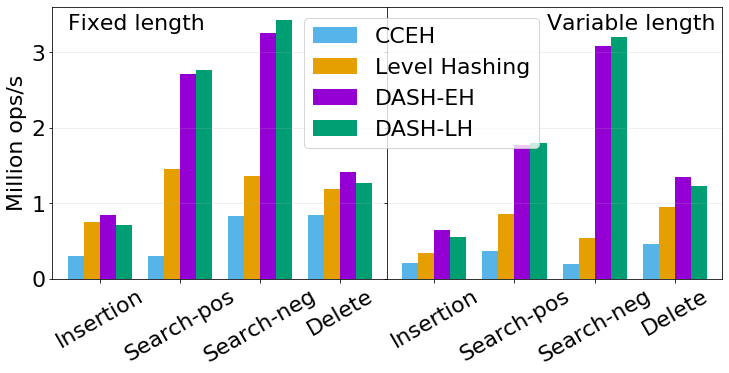

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, gridspec_kw={'wspace': 0})
fig.set_size_inches(12, 5, forward=True)
p1 = ax1.bar(ind-width*1.5, fixed_data[:,0], width, color='#56b4e9')
p2 = ax1.bar(ind-width/2, fixed_data[:,1], width, color='#e69f00')
p3 = ax1.bar(ind+width/2, fixed_data[:,2], width, color='#9400d3')
p4 = ax1.bar(ind+width*1.5, fixed_data[:,3], width, color='#009e73')

p5 = ax2.bar(ind-width*1.5, vl_data[:,0], width, color='#56b4e9')
p6 = ax2.bar(ind-width/2, vl_data[:,1], width, color='#e69f00')
p7 = ax2.bar(ind+width/2, vl_data[:,2], width, color='#9400d3')
p8 = ax2.bar(ind+width*1.5, vl_data[:,3], width, color='#009e73')

ax1.set(ylabel='Million ops/s')
plt.xticks(ind, labels)
ax1.tick_params(axis="x", rotation=30) 
ax2.tick_params(axis="x", rotation=30) 

ax2.legend((p1[0], p2[0], p3[0], p4[0]), ('CCEH', 'Level Hashing', 'DASH-EH', 'DASH-LH'),
           ncol=1, loc='upper left', bbox_to_anchor=(-0.28, 1, 1., 0))

ax1.text(-0.4, 3.3, "Fixed length")
ax2.text(1.4, 3.3, "Variable length")
ax1.grid(axis='y', alpha=0.25)
ax2.grid(axis='y', alpha=0.25)
plt.show()

In [65]:
fig.savefig('5-single.pdf', bbox_inches='tight')